In [ ]:
!pip install opendatasets

In [ ]:
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/ravidussilva/real-ai-art")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaitlynv
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ravidussilva/real-ai-art


100%|██████████| 9.95G/9.95G [02:01<00:00, 88.2MB/s]


In [ ]:
import os

os.listdir('real-ai-art/Real_AI_SD_LD_Dataset/train')
data_dir = 'real-ai-art/Real_AI_SD_LD_Dataset'

# Define the training paths
train_dir = os.path.join(data_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for dir in all_directories:
    # Check if the directory represents human-drawn images
    if not dir.startswith('AI_'):
        train_human.append(os.path.join(train_dir, dir))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, dir))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for idx, dir in enumerate(train_human):
    print(f"{idx}. {dir}")

print("\nTest directories containing AI-generated images:")
for idx, dir in enumerate(train_ai):
    print(f"{idx}. {dir}")

Test directories containing human-drawn images:
0. real-ai-art/Real_AI_SD_LD_Dataset/train/expressionism
1. real-ai-art/Real_AI_SD_LD_Dataset/train/art_nouveau
2. real-ai-art/Real_AI_SD_LD_Dataset/train/renaissance
3. real-ai-art/Real_AI_SD_LD_Dataset/train/impressionism
4. real-ai-art/Real_AI_SD_LD_Dataset/train/ukiyo_e
5. real-ai-art/Real_AI_SD_LD_Dataset/train/romanticism
6. real-ai-art/Real_AI_SD_LD_Dataset/train/realism
7. real-ai-art/Real_AI_SD_LD_Dataset/train/post_impressionism
8. real-ai-art/Real_AI_SD_LD_Dataset/train/surrealism
9. real-ai-art/Real_AI_SD_LD_Dataset/train/baroque

Test directories containing AI-generated images:
0. real-ai-art/Real_AI_SD_LD_Dataset/train/AI_LD_impressionism
1. real-ai-art/Real_AI_SD_LD_Dataset/train/AI_SD_expressionism
2. real-ai-art/Real_AI_SD_LD_Dataset/train/AI_LD_art_nouveau
3. real-ai-art/Real_AI_SD_LD_Dataset/train/AI_LD_realism
4. real-ai-art/Real_AI_SD_LD_Dataset/train/AI_SD_baroque
5. real-ai-art/Real_AI_SD_LD_Dataset/train/AI_LD_ukiy

In [ ]:
# Define the test paths
test_dir = os.path.join(data_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for dir in all_directories:
    # Check if the directory represents human-drawn images
    if not dir.startswith('AI_'):
        test_human.append(os.path.join(test_dir, dir))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, dir))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for idx, dir in enumerate(test_human):
    print(f"{idx}. {dir}")

print("\nTest directories containing AI-generated images:")
for idx, dir in enumerate(test_ai):
    print(f"{idx}. {dir}")

Test directories containing human-drawn images:
0. real-ai-art/Real_AI_SD_LD_Dataset/test/expressionism
1. real-ai-art/Real_AI_SD_LD_Dataset/test/art_nouveau
2. real-ai-art/Real_AI_SD_LD_Dataset/test/renaissance
3. real-ai-art/Real_AI_SD_LD_Dataset/test/impressionism
4. real-ai-art/Real_AI_SD_LD_Dataset/test/ukiyo_e
5. real-ai-art/Real_AI_SD_LD_Dataset/test/romanticism
6. real-ai-art/Real_AI_SD_LD_Dataset/test/realism
7. real-ai-art/Real_AI_SD_LD_Dataset/test/post_impressionism
8. real-ai-art/Real_AI_SD_LD_Dataset/test/surrealism
9. real-ai-art/Real_AI_SD_LD_Dataset/test/baroque

Test directories containing AI-generated images:
0. real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_impressionism
1. real-ai-art/Real_AI_SD_LD_Dataset/test/AI_SD_expressionism
2. real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_art_nouveau
3. real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_realism
4. real-ai-art/Real_AI_SD_LD_Dataset/test/AI_SD_baroque
5. real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_ukiyo-e
6. real-ai-a

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import os
import random
from matplotlib import pyplot as plt
import cv2

import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

import keras_tuner as kt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
# Plot k-number of images from the dataset
def plot_im(directory, k):
    files = os.listdir(directory)
    im = random.choices(files, k=k)

    fig = plt.figure()

    for i in range(k):
        im_i_path = os.path.join(directory, im[i])  # File path
        im_i = cv2.imread(im_i_path)

        # Add subplot
        ax = fig.add_subplot(int(np.sqrt(k)), int(np.sqrt(k)), i + 1)

        # Plot image
        ax.imshow(im_i)
        ax.axis('off')

        # Display filename below the image
        ax.set_title(im[i], fontsize = 8, pad = 2)

    plt.tight_layout()  # Adjust layout
    plt.show()

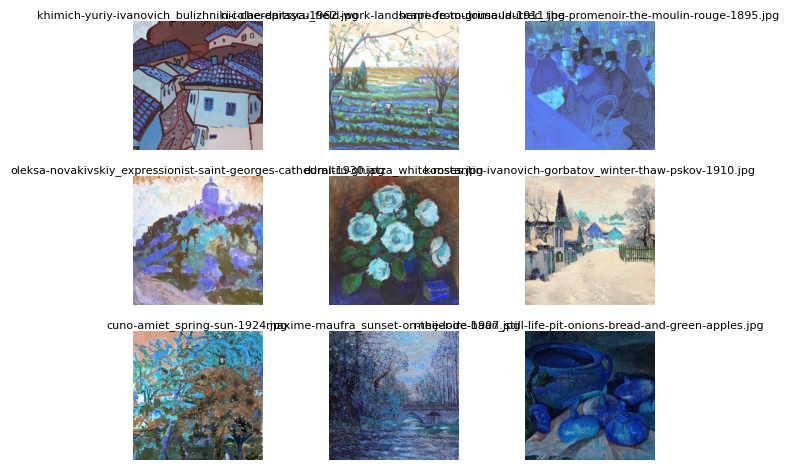

In [ ]:
# Visualize random images from train_human. Catagory is sorted in order of output in cell 2
real_im = plot_im(directory = train_human[7], k = 9)
plt.show()

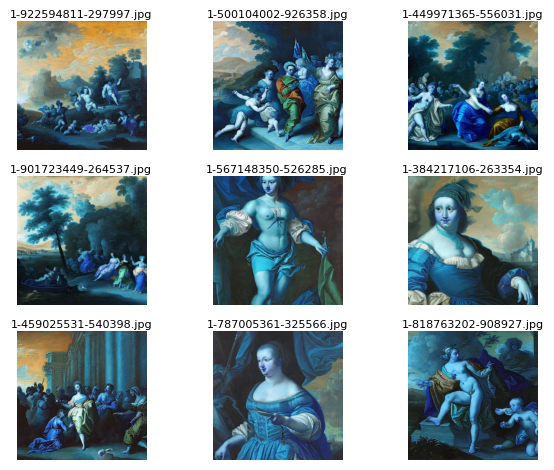

In [ ]:
# Visualize random images from train_ai. Catagory is sorted in order of output in cell 2
ai_im = plot_im(directory = train_ai[4], k = 9)
plt.show()


In [ ]:
# Initialize lists to store file paths and labels
paths = []
labels = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for dir in train_human:
    for file in os.listdir(dir):
        filepath = os.path.join(dir, file)
        paths.append(filepath)
        labels.append("human")

# Label files under train_ai as "AI"
for dir in train_ai:
    for file in os.listdir(dir):
        filepath = os.path.join(dir, file)
        paths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': paths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [ ]:
# Display the first few rows of the train_data DataFrame
print(train_data.head())


                                            filepath  label
0  real-ai-art/Real_AI_SD_LD_Dataset/train/expres...  human
1  real-ai-art/Real_AI_SD_LD_Dataset/train/expres...  human
2  real-ai-art/Real_AI_SD_LD_Dataset/train/expres...  human
3  real-ai-art/Real_AI_SD_LD_Dataset/train/expres...  human
4  real-ai-art/Real_AI_SD_LD_Dataset/train/expres...  human


In [ ]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)


Number of files under each label:
label
AI       105015
human     50000
Name: count, dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Define the augmentation parameters
humandata = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Count images for each label
ai_count = train_data['label'].value_counts().get('AI', 0)
human_count = train_data['label'].value_counts().get('human', 0)

# Number of human augmented images needed to balance
augment_count = ai_count - human_count

# Only augment if there are fewer human images
if augment_count > 0:
    human_images = train_data[train_data['label'] == 'human']['filepath']
    augmented_paths, augmented_labels = [], []

    # Directory to save augmented images
    augmented_dir = "augmented_human_images/"
    os.makedirs(augmented_dir, exist_ok=True)

    # Generate augmented images across all human images
    for path in human_images:
        if augment_count <= 0:  # Stop when required augmentation is reached
            break

        image = tf.keras.preprocessing.image.load_img(path)
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        image_array = image_array.reshape((1,) + image_array.shape)  # Reshape for batch

        # Generate augmented images and add them to path and label lists
        i = 0
        for batch in humandata.flow(image_array, batch_size=1):
            if augment_count <= 0:  # Stop when required augmentation is reached
                break

            # Define a unique filename for each augmented image
            unique_filename = f"{augmented_dir}augmented_{os.path.basename(path).split('.')[0]}_{i}.jpg"

            # Save augmented image
            aug_image = tf.keras.preprocessing.image.array_to_img(batch[0], scale=True)
            aug_image.save(unique_filename)

            # Append new paths and labels
            augmented_paths.append(unique_filename)
            augmented_labels.append('human')

            i += 1
            augment_count -= 1  # Decrement the remaining images to augment

    # Add augmented data to train_data
    augmented_data = pd.DataFrame({'filepath': augmented_paths, 'label': augmented_labels})
    train_data = pd.concat([train_data, augmented_data], ignore_index=True)

train_data


,filepath,label
0,real-ai-art/Real_AI_SD_LD_Dataset/train/expres...,human
1,real-ai-art/Real_AI_SD_LD_Dataset/train/expres...,human
2,real-ai-art/Real_AI_SD_LD_Dataset/train/expres...,human
3,real-ai-art/Real_AI_SD_LD_Dataset/train/expres...,human
4,real-ai-art/Real_AI_SD_LD_Dataset/train/expres...,human
...,...,...
210025,augmented_human_images/augmented_princess-fahr...,human
210026,augmented_human_images/augmented_princess-fahr...,human
210027,augmented_human_images/augmented_princess-fahr...,human
210028,augmented_human_images/augmented_princess-fahr...,human


In [ ]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
human    105015
AI       105015
Name: count, dtype: int64


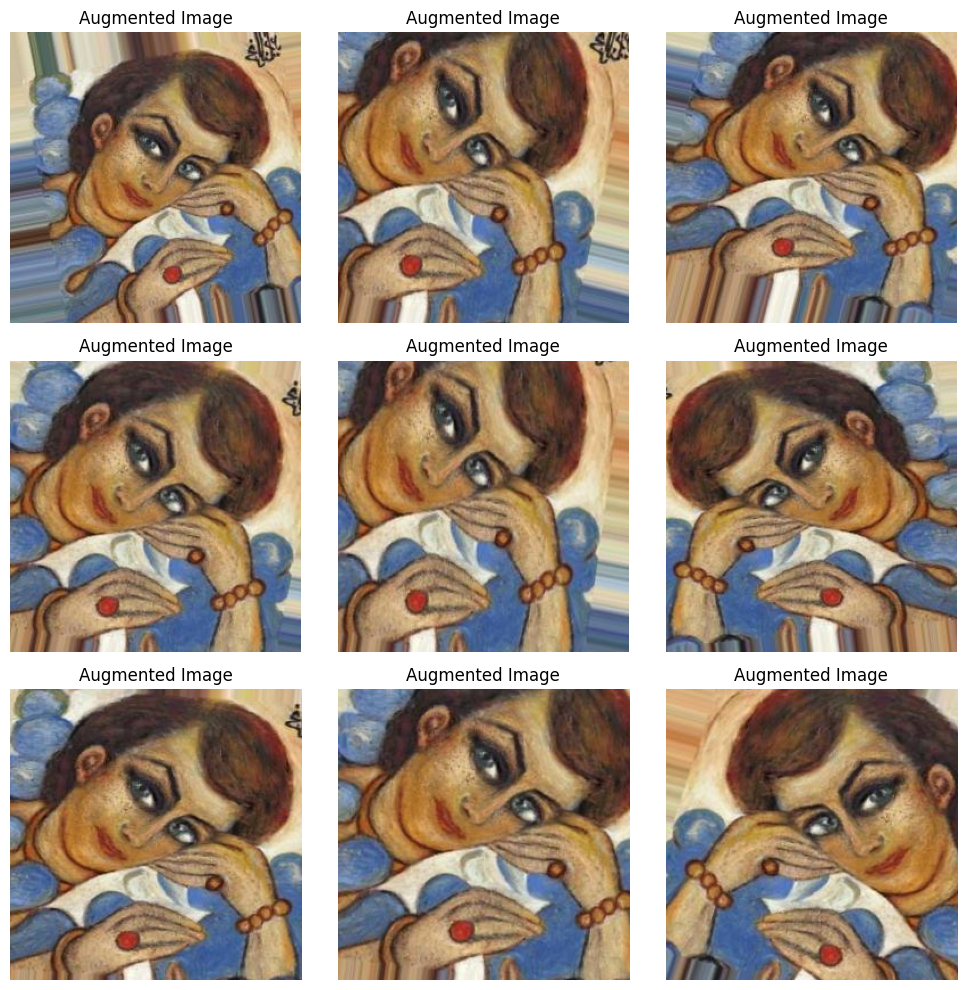

In [ ]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directory where augmented images are saved
augmented_dir = "augmented_human_images/"

# Load a few random augmented images
augmented_images = random.sample(os.listdir(augmented_dir), 9)  # Display 9 images for example

# Plot the images in a 3x3 grid
plt.figure(figsize=(10, 10))
for i, img_name in enumerate(augmented_images):
    img_path = os.path.join(augmented_dir, img_name)
    img = load_img(img_path)  # Load image
    img_array = img_to_array(img)  # Convert to array

    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array.astype("uint8"))
    plt.axis('off')
    plt.title("Augmented Image")

plt.tight_layout()
plt.show()


In [ ]:
# Initialize lists to store file paths and labels
paths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for dir in test_human:
    for file in os.listdir(dir):
        filepath = os.path.join(dir, file)
        paths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for dir in test_ai:
    for file in os.listdir(dir):
        filepath = os.path.join(dir, file)
        paths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': paths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index = True)

In [ ]:
# Display the first few rows of the test_data DataFrame
print(test_data.head())

# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("\nNumber of files under each label:")
print(file_counts)

                                            filepath  label
0  real-ai-art/Real_AI_SD_LD_Dataset/test/express...  human
1  real-ai-art/Real_AI_SD_LD_Dataset/test/express...  human
2  real-ai-art/Real_AI_SD_LD_Dataset/test/express...  human
3  real-ai-art/Real_AI_SD_LD_Dataset/test/express...  human
4  real-ai-art/Real_AI_SD_LD_Dataset/test/express...  human

Number of files under each label:
label
AI       20000
human    10000
Name: count, dtype: int64


In [ ]:
training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )


train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    shuffle=True
)

Found 210030 validated image filenames belonging to 2 classes.


In [ ]:
train_dataset.class_indices


{'AI': 0, 'human': 1}

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (224, 224),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'binary',
                                                    shuffle = False)   # to associate the prediction with expected output


Found 30000 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load ResNet50 with pre-trained weights, without the top layer
base_model = tf.keras.applications.ResNet50(weights = "imagenet", include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model
base_model.trainable = False

# Add new layers on top for binary classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")  # Two classes: AI vs. non-AI
])

# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
epochs = 5
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1298s 390ms/step - accuracy: 0.7338 - loss: 0.5237 - val_accuracy: 0.7445 - val_loss: 0.4880
Epoch 2/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1275s 388ms/step - accuracy: 0.7816 - loss: 0.4254 - val_accuracy: 0.7316 - val_loss: 0.4966
Epoch 3/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1228s 371ms/step - accuracy: 0.7898 - loss: 0.4303 - val_accuracy: 0.7867 - val_loss: 0.4347
Epoch 4/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1215s 369ms/step - accuracy: 0.7921 - loss: 0.4645 - val_accuracy: 0.7436 - val_loss: 0.4701
Epoch 5/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1220s 369ms/step - accuracy: 0.7957 - loss: 0.4592 - val_accuracy: 0.8043 - val_loss: 0.4191


In [ ]:
model.save("my_model.keras")

In [ ]:
# Fine-tuning: Unfreeze some layers of the base model and retrain with a lower learning rate
base_model.trainable = True
for layer in base_model.layers[:-10]:  # Freeze all layers except the last 10
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# Continue training (fine-tuning)
fine_tune_epochs = 3
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(
    train_dataset,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=test_dataset
)

Epoch 5/8
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1306s 392ms/step - accuracy: 0.7877 - loss: 0.6959 - val_accuracy: 0.8573 - val_loss: 0.3375
Epoch 6/8
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1288s 392ms/step - accuracy: 0.8735 - loss: 0.2916 - val_accuracy: 0.8789 - val_loss: 0.2921
Epoch 7/8
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1257s 382ms/step - accuracy: 0.8907 - loss: 0.2482 - val_accuracy: 0.8868 - val_loss: 0.2728
Epoch 8/8
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 1270s 379ms/step - accuracy: 0.9042 - loss: 0.2218 - val_accuracy: 0.8894 - val_loss: 0.2553


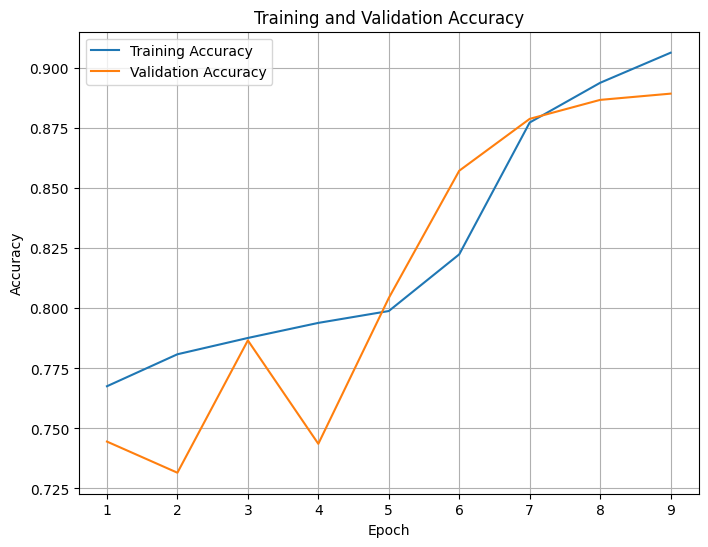

In [ ]:
# Plot the accuracies
import matplotlib.pyplot as plt

# Combine training and fine-tuning histories
train_acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Plot the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_confusion_matrix(actual, predicted, class_names):
    fig, ax = plt.subplots(figsize=(10,10))

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)

    cm_display.plot(ax=ax)
    ax.set_xticklabels(class_names, rotation=60)
    plt.show()


def get_predictions_and_labels(model, test_dataset):
    all_preds = []
    all_labels = []

    for batch in test_dataset:
        images, labels = batch  # Assuming dataset is in (image, label) format
        preds = model.predict(images, verbose=0)  # Get predictions

        all_preds.extend(np.argmax(preds, axis=1))  # Convert logits to class indices
        all_labels.extend(labels)  # Convert labels to NumPy array

    return np.array(all_labels), np.array(all_preds)


# After training the model, get predictions and true labels
actual, predicted = get_predictions_and_labels(model, test_dataset)

# Plot the confusion matrix
classes = ["human", "AI"] # This is just the list of classes, so AI-art v human-art in our case
plot_confusion_matrix(actual, predicted, classes)

# Adjust layout to fit nicely
plt.tight_layout()

In [ ]:
# EfficientNetB0 to compare the pre-trained model
from tensorflow.keras.applications import EfficientNetB0
efficient_base = EfficientNetB0(weights = "imagenet", include_top=False, input_shape=(224, 224, 3))
efficient_base.trainable = False # Freeze the pre-trained layers

efficient_model = models.Sequential([
    efficient_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")  # Two classes: AI vs. non-AI
])

efficient_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train EfficientNetB0
efficient_history = efficient_model.fit(
    train_dataset,
    epochs = 5,
    validation_data = test_dataset
)

# Unfreeze the base model
efficient_base.trainable = True
for layer in efficient_base.layers[:-10]:  # Freeze all layers except the last 10
    layer.trainable = False

efficient_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Continue training
fine_tune_history = efficient_model.fit(
    train_dataset,
    epochs = 3,
    initial_epoch = efficient_history.epoch[-1],
    validation_data = test_dataset
)

resnet_train_acc = history.history['accuracy'] + history_fine.history['accuracy']
resnet_val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

efficient_train_acc = efficient_history.history['accuracy'] + fine_tune_history.history['accuracy']
efficient_val_acc = efficient_history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']

plt.figure(figsize = (10, 6))
plt.plot(resnet_train_acc, label = "ResNet50 Training Accuracy")
plt.plot(resnet_val_acc, label = "ResNet50 Validation Accuracy")
plt.plot(efficient_train_acc, label = "EfficientNetB0 Training Accuracy")
plt.plot(efficient_val_acc, label = 'EfficientNetB0 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()